In [19]:
import pandas as pd
import cupy as cp
import cubewalkers as cw
import matplotlib.pyplot as plt
from matplotlib.colors import CenteredNorm
from matplotlib.patches import Rectangle
%matplotlib inline

plt.rcParams.update({'font.size':20})

In [20]:
QCF = pd.read_csv('data/quasicoherence_fuzzy_withsource.csv')
QC = pd.read_csv('data/quasicoherence_nonfuzzy_withsource.csv')
QCFNS = pd.read_csv('data/quasicoherence_fuzzy_sourceless.csv')
QCNS = pd.read_csv('data/quasicoherence_nonfuzzy_sourceless.csv')
DC = pd.read_csv('data/derrida_coefficients.csv')
QC = QC.merge(QCF)
QC = QC.merge(QCNS)
QC = QC.merge(QCFNS)
QC = QC.merge(DC)
QC.columns = ['name', 
              'SQC', 'AQC', 
              'SFQC', 'AFQC', 
              'SQCNS', 'AQCNS', 
              'SFQCNS', 'AFQCNS', 
              'SDC', 'ADC', 
              'SDCNS', 'ADCNS']



N = []
NS = []
names = []
SFHD = []
AFHD = []

with open('data/hamming_distances.csv', 'r') as f:
    for row in f:
        entries = row.split(',')
        name = entries.pop(0)
        scheme = entries.pop(0)
        fhd = float(entries.pop())
        
        if scheme == 'synchronous':
            names.append(name)
            SFHD.append(fhd)
        elif scheme == 'asynchronous':
            AFHD.append(fhd)

for name in sorted(names):
    with open(f'models/cell_collective/{name}.txt') as f:
        nt = 0
        ns = 0
        for row in f:
            nt += 1
            if row.split(',')[0].strip() == row.split(',')[1].strip():
                ns += 1
        N.append(nt)
        NS.append(ns)

HD = pd.DataFrame({
    'name': names,
    'SFHD': SFHD,
    'AFHD': AFHD,
    'N': N,
    'NS': NS,
})

QC=QC.merge(HD)

# Phenotypic Fragility = 
# long-term difference in node avg. values after initial 1-node perturbation
QC['AF'] = (1-QC['AFQC'])*(QC['N'])
QC['SF'] = (1-QC['SFQC'])*(QC['N'])
QC['AFNS'] = (1-QC['AFQCNS'])*(QC['N']-QC['NS'])
QC['SFNS'] = (1-QC['SFQCNS'])*(QC['N']-QC['NS'])

QC

,name,SQC,AQC,SFQC,AFQC,SQCNS,AQCNS,SFQCNS,AFQCNS,SDC,...,SDCNS,ADCNS,SFHD,AFHD,N,NS,AF,SF,AFNS,SFNS
0,Apoptosis Network,0.902,0.903,0.976,0.975,0.949518,0.949877,0.989071,0.990290,1.01048,...,0.928969,0.953091,1.431,1.269,41,2,1.025,0.984,0.378690,0.426231
1,Arabidopsis thaliana Cell Cycle,1.000,0.913,0.998,0.972,1.000000,0.912886,0.997664,0.971618,1.28010,...,1.274438,1.221937,1.548,1.213,14,0,0.392,0.028,0.397348,0.032704
2,Aurora Kinase A in Neuroblastoma,0.762,0.771,0.944,0.941,0.921789,0.931979,0.958583,0.950386,1.04914,...,0.994031,0.992493,1.973,1.367,23,4,1.357,1.288,0.942666,0.786923
3,B bronchiseptica and T retortaeformis coinfection,0.911,0.924,0.991,0.988,0.928908,0.943123,0.992983,0.990211,1.00465,...,0.971556,0.968350,0.589,0.867,53,1,0.636,0.477,0.509028,0.364884
4,B cell differentiation,0.735,0.739,0.957,0.956,0.951741,0.955906,0.986118,0.987748,1.00177,...,0.704883,0.742290,0.936,0.991,22,5,0.968,0.946,0.208284,0.235994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Trichostrongylus retortaeformis,0.845,0.880,0.973,0.971,0.879136,0.917744,0.978741,0.978549,1.00755,...,0.931340,0.963422,0.905,0.984,26,1,0.754,0.702,0.536275,0.531475
68,Tumour Cell Invasion and Migration,0.883,0.896,0.964,0.960,0.941880,0.957587,0.979554,0.978880,0.72821,...,0.697983,0.871744,1.220,1.273,32,2,1.280,1.152,0.633600,0.613380
69,VEGF Pathway of Drosophila Signaling Pathway,0.556,0.556,0.957,0.958,1.000000,1.000000,1.000000,1.000000,0.96077,...,0.712893,0.725815,0.761,0.744,18,8,0.756,0.774,0.000000,0.000000
70,Wg Pathway of Drosophila Signalling Pathways,0.462,0.462,0.964,0.964,1.000000,0.999967,1.000000,0.999264,0.98156,...,0.464533,0.584200,0.941,0.956,26,14,0.936,0.936,0.008832,0.000000


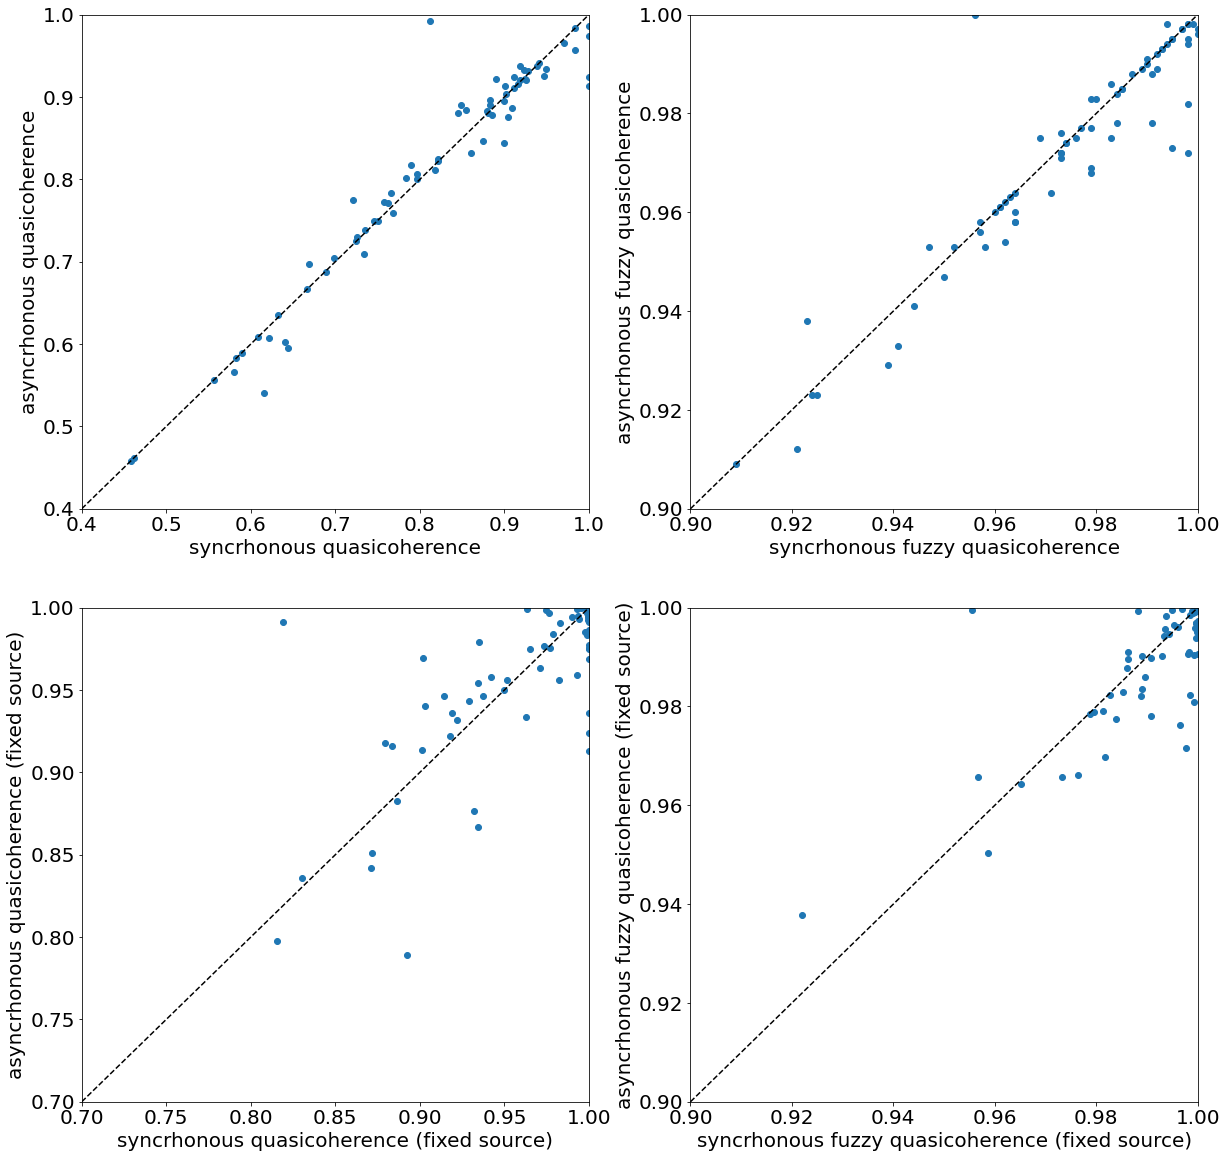

In [21]:
fig,ax = plt.subplots(2,2,figsize=(20,20))
fig.set_facecolor('white')

ax[0,0].scatter(QC['SQC'],QC['AQC'])
ax[0,0].set_xlabel('syncrhonous quasicoherence')
ax[0,0].set_ylabel('asyncrhonous quasicoherence')
ax[0,0].set_xlim(0.4,1)
ax[0,0].set_ylim(0.4,1)

ax[0,1].scatter(QC['SFQC'],QC['AFQC'])
ax[0,1].set_xlabel('syncrhonous fuzzy quasicoherence')
ax[0,1].set_ylabel('asyncrhonous fuzzy quasicoherence')
ax[0,1].set_xlim(0.9,1)
ax[0,1].set_ylim(0.9,1)

ax[1,0].scatter(QC['SQCNS'],QC['AQCNS'])
ax[1,0].set_xlabel('syncrhonous quasicoherence (fixed source)')
ax[1,0].set_ylabel('asyncrhonous quasicoherence (fixed source)')
ax[1,0].set_xlim(0.7,1)
ax[1,0].set_ylim(0.7,1)

ax[1,1].scatter(QC['SFQCNS'],QC['AFQCNS'])
ax[1,1].set_xlabel('syncrhonous fuzzy quasicoherence (fixed source)')
ax[1,1].set_ylabel('asyncrhonous fuzzy quasicoherence (fixed source)')
ax[1,1].set_xlim(0.9,1)
ax[1,1].set_ylim(0.9,1)

for sub_ax in ax.flatten():
    sub_ax.axline((1,1),slope=1,linestyle='--',color='k')

plt.show()

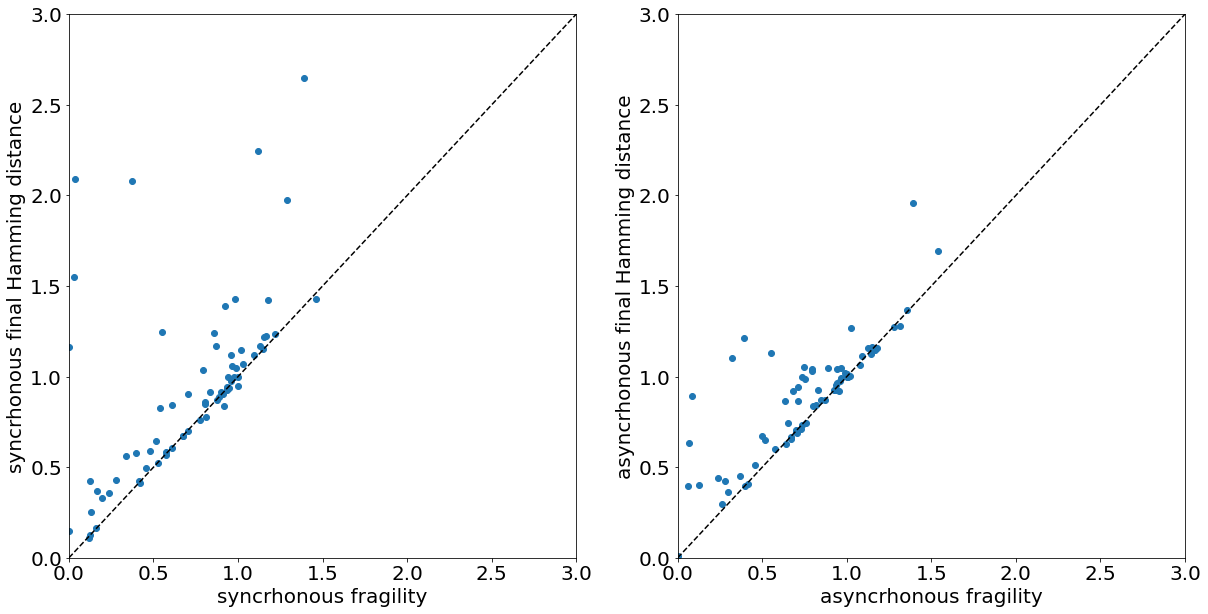

In [22]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
fig.set_facecolor('white')

ax[0].scatter(QC['SF'],QC['SFHD'])
ax[0].set_xlabel('syncrhonous fragility')
ax[0].set_ylabel('syncrhonous final Hamming distance')
ax[0].set_xlim(0,3)
ax[0].set_ylim(0,3)
ax[1].scatter(QC['AF'],QC['AFHD'])
ax[1].set_xlabel('asyncrhonous fragility')
ax[1].set_ylabel('asyncrhonous final Hamming distance')
ax[1].set_xlim(0,3)
ax[1].set_ylim(0,3)

for sub_ax in ax.flatten():
    sub_ax.axline((1,1),slope=1,linestyle='--',color='k')

plt.show()

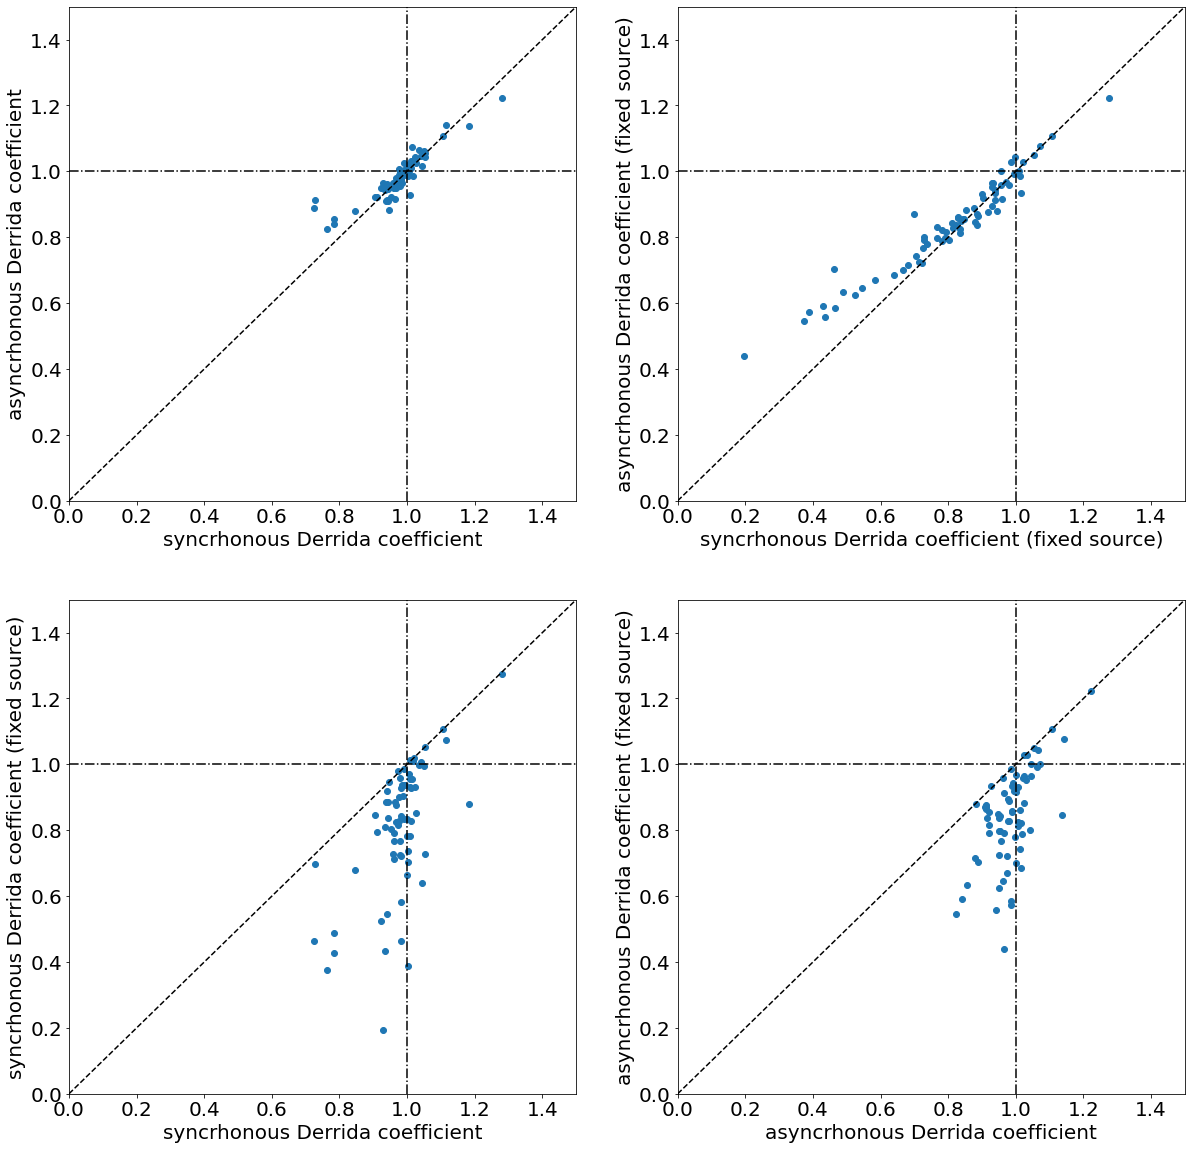

In [23]:
fig,ax = plt.subplots(2,2,figsize=(20,20))
fig.set_facecolor('white')

ax[0,0].scatter(QC['SDC'],QC['ADC'])
ax[0,0].set_xlabel('syncrhonous Derrida coefficient')
ax[0,0].set_ylabel('asyncrhonous Derrida coefficient')
ax[0,0].set_xlim(0,1.5)
ax[0,0].set_ylim(0,1.5)

ax[0,1].scatter(QC['SDCNS'],QC['ADCNS'])
ax[0,1].set_xlabel('syncrhonous Derrida coefficient (fixed source)')
ax[0,1].set_ylabel('asyncrhonous Derrida coefficient (fixed source)')
ax[0,1].set_xlim(0,1.5)
ax[0,1].set_ylim(0,1.5)

ax[1,0].scatter(QC['SDC'],QC['SDCNS'])
ax[1,0].set_xlabel('syncrhonous Derrida coefficient')
ax[1,0].set_ylabel('syncrhonous Derrida coefficient (fixed source)')
ax[1,0].set_xlim(0,1.5)
ax[1,0].set_ylim(0,1.5)

ax[1,1].scatter(QC['ADC'],QC['ADCNS'])
ax[1,1].set_xlabel('asyncrhonous Derrida coefficient')
ax[1,1].set_ylabel('asyncrhonous Derrida coefficient (fixed source)')
ax[1,1].set_xlim(0,1.5)
ax[1,1].set_ylim(0,1.5)

for sub_ax in ax.flatten():
    sub_ax.axline((1,1),slope=1,linestyle='--',color='k')
    sub_ax.hlines(1,0,1.5,linestyle='-.',color='k')
    sub_ax.vlines(1,0,1.5,linestyle='-.',color='k')

plt.show()

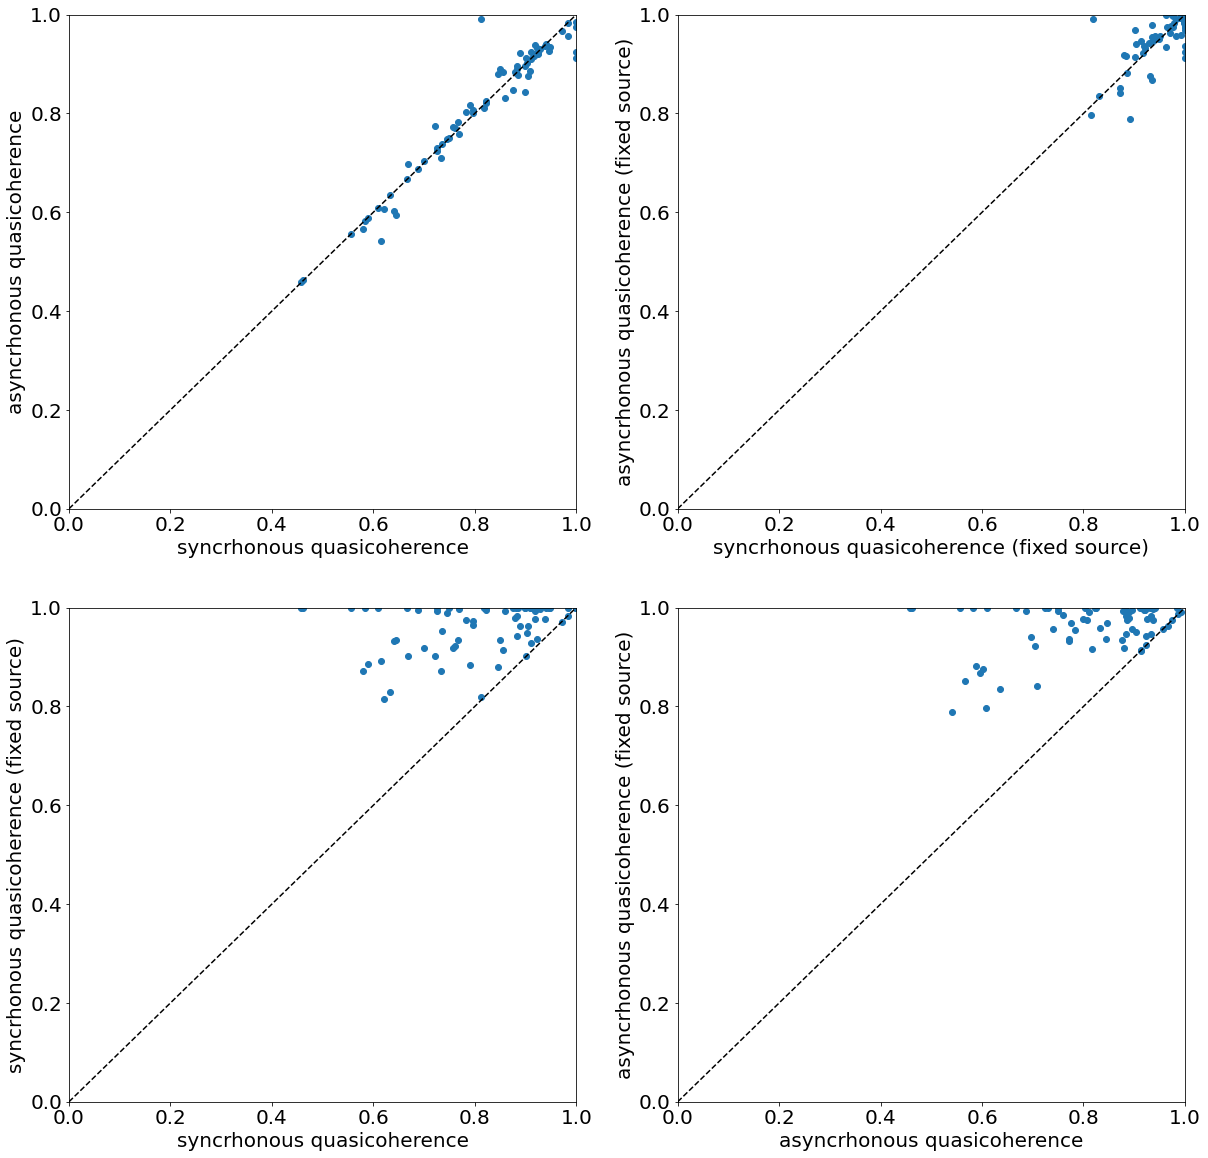

In [24]:
fig,ax = plt.subplots(2,2,figsize=(20,20))
fig.set_facecolor('white')

ax[0,0].scatter(QC['SQC'],QC['AQC'])
ax[0,0].set_xlabel('syncrhonous quasicoherence')
ax[0,0].set_ylabel('asyncrhonous quasicoherence')
ax[0,0].set_xlim(0,1.0)
ax[0,0].set_ylim(0,1.0)

ax[0,1].scatter(QC['SQCNS'],QC['AQCNS'])
ax[0,1].set_xlabel('syncrhonous quasicoherence (fixed source)')
ax[0,1].set_ylabel('asyncrhonous quasicoherence (fixed source)')
ax[0,1].set_xlim(0,1.0)
ax[0,1].set_ylim(0,1.0)

ax[1,0].scatter(QC['SQC'],QC['SQCNS'])
ax[1,0].set_xlabel('syncrhonous quasicoherence')
ax[1,0].set_ylabel('syncrhonous quasicoherence (fixed source)')
ax[1,0].set_xlim(0,1.0)
ax[1,0].set_ylim(0,1.0)

ax[1,1].scatter(QC['AQC'],QC['AQCNS'])
ax[1,1].set_xlabel('asyncrhonous quasicoherence')
ax[1,1].set_ylabel('asyncrhonous quasicoherence (fixed source)')
ax[1,1].set_xlim(0,1.0)
ax[1,1].set_ylim(0,1.0)

for sub_ax in ax.flatten():
    sub_ax.axline((1,1),slope=1,linestyle='--',color='k')

plt.show()

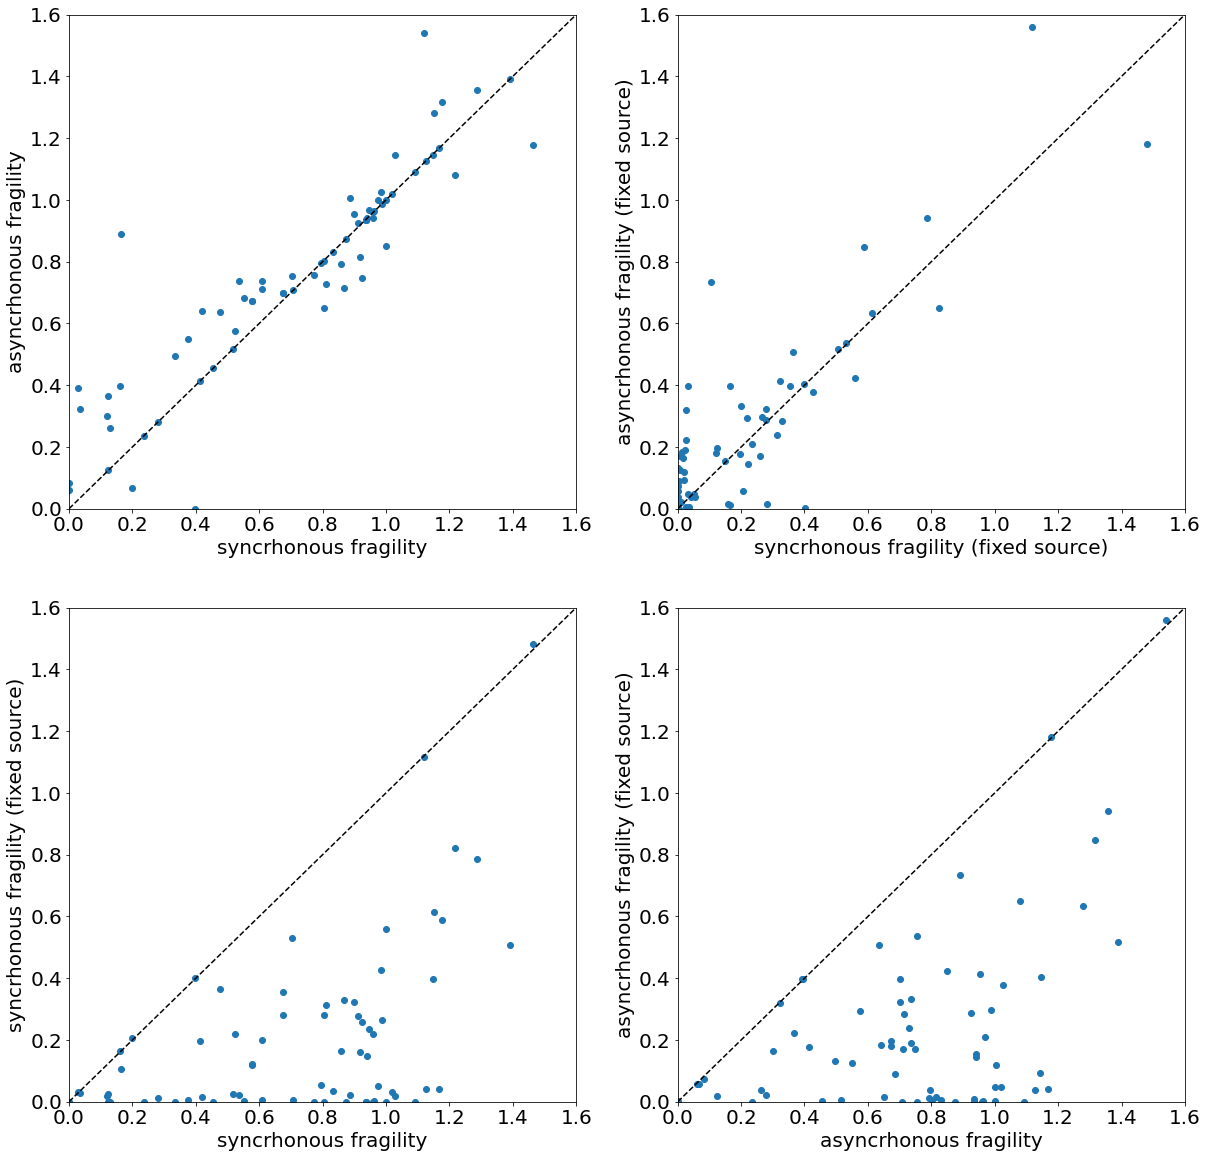

In [25]:
fig,ax = plt.subplots(2,2,figsize=(20,20))
fig.set_facecolor('white')

ax[0,0].scatter(QC['SF'],QC['AF'])
ax[0,0].set_xlabel('syncrhonous fragility')
ax[0,0].set_ylabel('asyncrhonous fragility')
ax[0,0].set_xlim(0,1.6)
ax[0,0].set_ylim(0,1.6)

ax[0,1].scatter(QC['SFNS'],QC['AFNS'])
ax[0,1].set_xlabel('syncrhonous fragility (fixed source)')
ax[0,1].set_ylabel('asyncrhonous fragility (fixed source)')
ax[0,1].set_xlim(0,1.6)
ax[0,1].set_ylim(0,1.6)

ax[1,0].scatter(QC['SF'],QC['SFNS'])
ax[1,0].set_xlabel('syncrhonous fragility')
ax[1,0].set_ylabel('syncrhonous fragility (fixed source)')
ax[1,0].set_xlim(0,1.6)
ax[1,0].set_ylim(0,1.6)

ax[1,1].scatter(QC['AF'],QC['AFNS'])
ax[1,1].set_xlabel('asyncrhonous fragility')
ax[1,1].set_ylabel('asyncrhonous fragility (fixed source)')
ax[1,1].set_xlim(0,1.6)
ax[1,1].set_ylim(0,1.6)

for sub_ax in ax.flatten():
    sub_ax.axline((1,1),slope=1,linestyle='--',color='k')

plt.show()

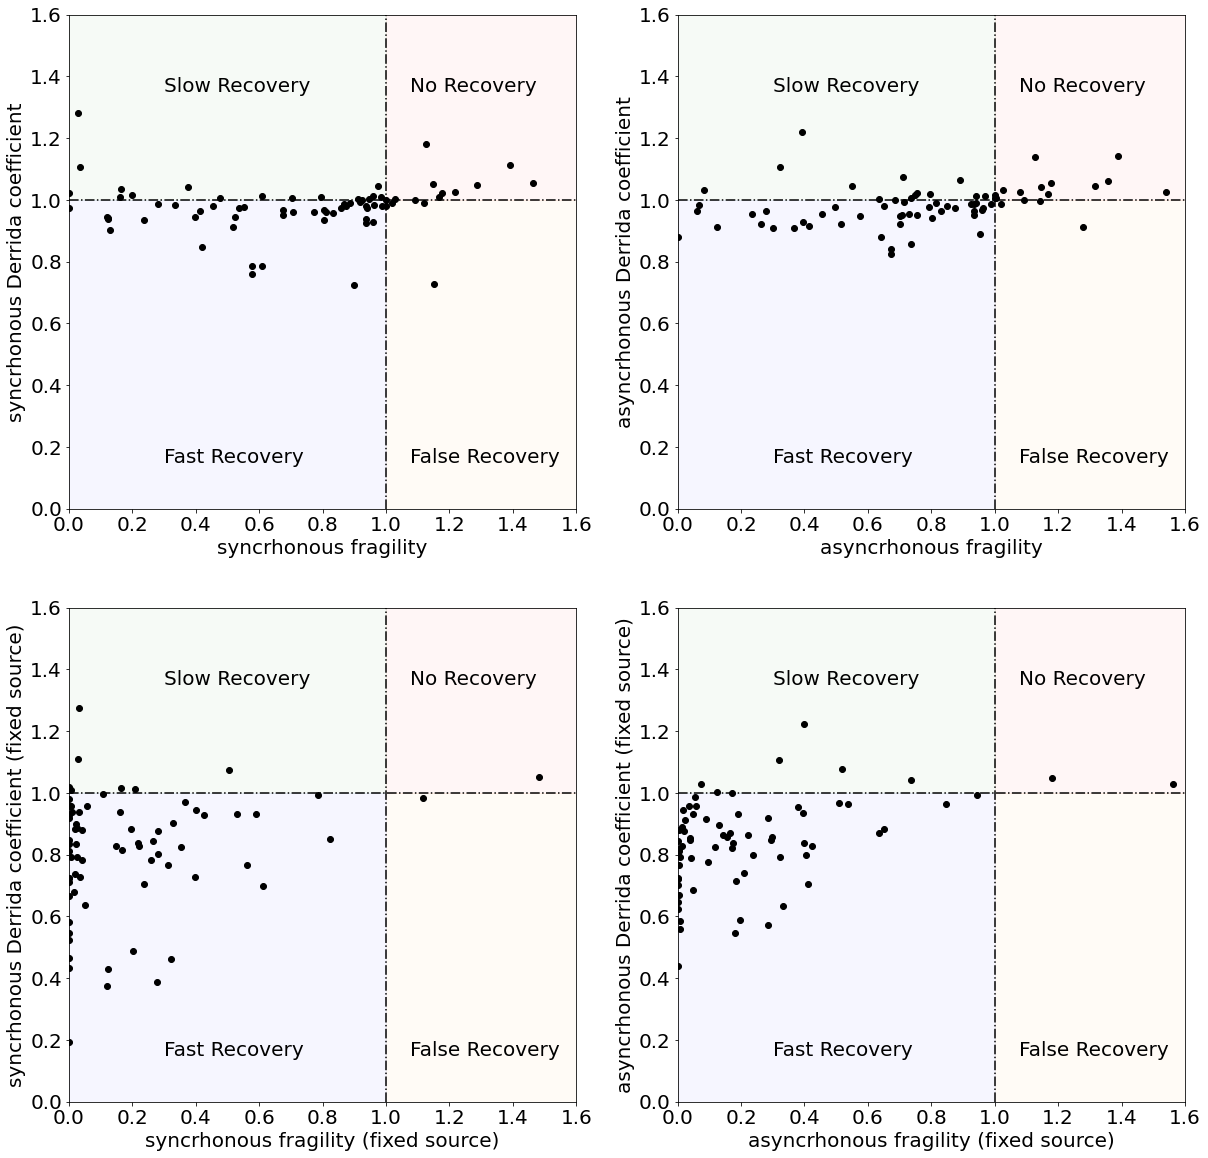

In [26]:
region_alpha = 0.035
cmap = plt.cm.get_cmap('coolwarm')
maxval = 1.6
cnorm=CenteredNorm(vcenter=0,halfrange=0.5)
fig,ax = plt.subplots(2,2,figsize=(20,20))
fig.set_facecolor('white')

for sub_ax in ax.flatten():
    regions = [
        Rectangle((0,0),1,1,color='blue',alpha=region_alpha),
        Rectangle((1,1),maxval-1,maxval-1,color='red',alpha=region_alpha),
        Rectangle((0,1),1,maxval-1,color='green',alpha=region_alpha),
        Rectangle((1,0),maxval-1,1,color='orange',alpha=region_alpha),
        ]
    
    #sub_ax.axline((1,1),slope=1,linestyle='--',color='k')
    sub_ax.hlines(1,0,maxval,linestyle='-.',color='k')
    sub_ax.vlines(1,0,maxval,linestyle='-.',color='k')
    [sub_ax.add_patch(r) for r in regions]
    sub_ax.annotate('Slow Recovery',xy=(0.3,1.35))
    sub_ax.annotate('Fast Recovery',xy=(0.3,0.15))
    sub_ax.annotate('False Recovery',xy=(1.075,0.15))
    sub_ax.annotate('No Recovery',xy=(1.075,1.35))

ax[0,0].scatter(QC['SF'],QC['SDC'],
                c='k')#c=QC['SF']-QC['SDC'],cmap=cmap, norm=cnorm)
ax[0,0].set_xlabel('syncrhonous fragility')
ax[0,0].set_ylabel('syncrhonous Derrida coefficient')
ax[0,0].set_xlim(0,maxval)
ax[0,0].set_ylim(0,maxval)

ax[0,1].scatter(QC['AF'],QC['ADC'],
                c='k')#c=QC['AF']-QC['ADC'],cmap=cmap, norm=cnorm)
ax[0,1].set_xlabel('asyncrhonous fragility')
ax[0,1].set_ylabel('asyncrhonous Derrida coefficient')
ax[0,1].set_xlim(0,maxval)
ax[0,1].set_ylim(0,maxval)

ax[1,0].scatter(QC['SFNS'],QC['SDCNS'],
                c='k')#c=QC['SFNS']-QC['SDCNS'],cmap=cmap, norm=cnorm)
ax[1,0].set_xlabel('syncrhonous fragility (fixed source)')
ax[1,0].set_ylabel('syncrhonous Derrida coefficient (fixed source)')
ax[1,0].set_xlim(0,maxval)
ax[1,0].set_ylim(0,maxval)

ax[1,1].scatter(QC['AFNS'],QC['ADCNS'],
                c='k')#c=QC['AFNS']-QC['ADCNS'],cmap=cmap, norm=cnorm)
ax[1,1].set_xlabel('asyncrhonous fragility (fixed source)')
ax[1,1].set_ylabel('asyncrhonous Derrida coefficient (fixed source)')
ax[1,1].set_xlim(0,maxval)
ax[1,1].set_ylim(0,maxval)




plt.show()